#LAB 8 : Classification

  1. Support Vector Machines 
  2. K-Nearest Neighbors
  3. Classification on MNIST Digit 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

#Support Vector Machines (SVM)



1. Try to maximize the margin of separation between data.
2. Instead of learning wx+b=0  separating hyperplane directly (like logistic regression), SVM try to learn wx+b=0, such that, the margin between two hyperplanes wx+b=1 and wx+b=-1 (also known as support vectors) is maximum. 
3. Margin between wx+b=1 and wx+b=-1 hyperplane is $\frac{2}{||w||}$
4. we have a constraint optimization problem of maximizing $\frac{2}{||w||}$, with constraints wx+b>=1 (for +ve class) and wx+b<=-1 (for -ve class).
5. As $y_{i}=1$ for +ve class and $y_{i}=-1$ for -ve class, the constraint can be re-written as:
$$y(wx+b)>=1$$

6. Final optimization is (i.e to find w and b):
$$\min_{||w||}\frac{1}{2}||w||,$$
$$y(wx+b) \geq 1,~\forall ~data $$



Acknowledgement:

https://pythonprogramming.net/predictions-svm-machine-learning-tutorial/

https://medium.com/deep-math-machine-learning-ai/chapter-3-1-svm-from-scratch-in-python-86f93f853dc

## Data generation:
1. Generate 2D gaussian data with fixed mean and variance for 2 class.(var=Identity, class1: mean[-4,-4], class2: mean[1,1], No. of data 25 from each class)
2. create the label matrix
3. Plot the generated data

(50, 2)
(50,)


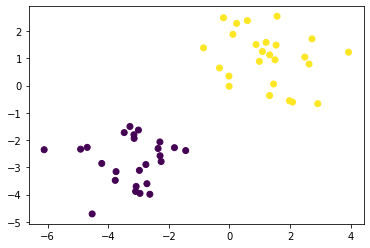

In [ ]:
No_sample=50
mean1=np.array([-3,-3])
var1=np.array([[1,0],[0,1]])
mean2=np.array([1,1])
var2=var1
data1=np.random.multivariate_normal(mean1,var1,int(No_sample/2))
data2=np.random.multivariate_normal(mean2,var2,int(No_sample/2))
X=np.concatenate((data1,data2))
print(X.shape)
y=np.concatenate((-1*np.ones(data1.shape[0]),np.ones(data2.shape[0])))
print(y.shape)

plt.figure()
plt.scatter(X[:,0],X[:,1],marker='o',c=y)

Create a data dictionary, which contains both label and data points.

In [ ]:
postiveX=[]
negativeX=[]

## Write your code here

#our data dictionary
data_dict = {-1:np.array(negativeX), 1:np.array(postiveX)} 

## SVM training
1. create a search space for w (i.e w1=w2),[0, 0.5*max((abs(feat)))] and  for b, [-max((abs(feat))),max((abs(feat)))], with appropriate step.
2. we will start with a higher step and find optimal w and b, then we will reduce the step and again re-evaluate the optimal one.

3. In each step, we will take transform of w, [1,1], [-1,1],[1,-1] and [-1,-1] to search arround the w. 

4. In every pass (for a fixed step size) we will store all the w, b and its corresponding ||w||, which make the data correctly classified as per the condition $y(wx+b) \geq 1$. 

5. Obtain the optimal hyperplane having minimum ||w||.

6. Start with the optimal w and repeat the same (step 3,4 and 5) for a reduced step size.


In [ ]:
# it is just a searching algorithem, not a complicated optimization algorithem, (just for understanding of concepts through visualization)

def SVM_Training(data_dict):

    # insert your code here
    
    return w,b


**Training**

In [ ]:
# All the required variables 
w=[] # Weights 2 dimensional vector
b=[] # Bias
w,b=SVM_Training(data_dict)
print(w)
print(b)

[0.53828338 0.53828338]
1.0398656205719554


## Visualization of the SVM separating hyperplanes (after training)

In [ ]:
def visualize(data_dict):
       
        plt.scatter(X[:,0],X[:,1],marker='o',c=y)

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane_value(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        
        hyp_x_min = np.min([np.min(data_dict[1]),np.min(data_dict[-1])])
        hyp_x_max = np.max([np.max(data_dict[1]),np.max(data_dict[-1])])

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane_value(hyp_x_min, w, b, 1)
        psv2 = hyperplane_value(hyp_x_max, w, b, 1)
        plt.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane_value(hyp_x_min, w, b, -1)
        nsv2 = hyperplane_value(hyp_x_max, w, b, -1)
        plt.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane_value(hyp_x_min, w, b, 0)
        db2 = hyperplane_value(hyp_x_max, w, b, 0)
        plt.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
        
        
        

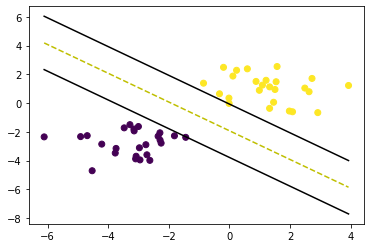

In [ ]:
fig = plt.figure()
visualize(data_dict)

**Testing**

In [ ]:
def predict(data,w,b):
  y_pred = ## write your code here
  return y_pred

test accuracy= 100.0


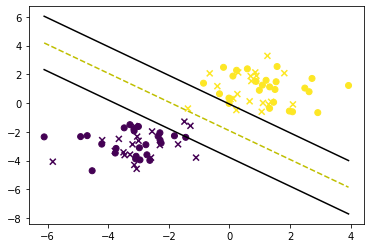

In [ ]:
No_test_sample=40
data1=np.random.multivariate_normal(mean1,var1,int(No_test_sample/2))
data2=np.random.multivariate_normal(mean2,var2,int(No_test_sample/2))
test_data=np.concatenate((data1,data2))
y_gr=np.concatenate((-1*np.ones(data1.shape[0]),np.ones(data2.shape[0])))

# evaluate with the trained model

y_pred = predict(test_data,w,b)
accuracy = # Write your code here
print('test accuracy=',accuracy)

#  Visualization
plt.figure()
visualize(data_dict)
plt.scatter(test_data[:,0],test_data[:,1],marker='x',c=y_gr)


**Use the Sci-kit Learn Package and perform Classification on the above dataset using the SVM algorithm**

In [ ]:
## Write your code here

#K-Nearest Neighbours (KNN)

Text(0.5, 1.0, 'Data visualization')

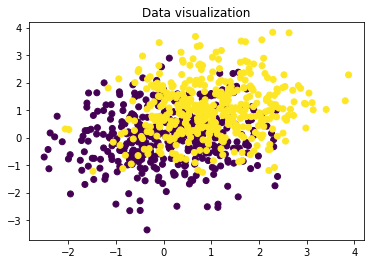

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mean1=np.array([0,0])
mean2=np.array([1,1])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data_train=np.concatenate((data1[:-100,],data2[:-100]))
label=np.concatenate((np.zeros(data1.shape[0]-100),np.ones(data2.shape[0]-100)))

plt.figure()
plt.scatter(data_train[:,0],data_train[:,1],c=label)
plt.title('Data visualization')

In [ ]:
def euclidean_distance(row1, row2):
  return np.linalg.norm(row1-row2)

In [ ]:
def get_neighbors(train,label_train, test_row, num_neighbors):
  ## write your code here
  
  return neighbors


In [ ]:
def predict_classification(neigbors):
  ## write your code here
  
  return prediction


In [ ]:
# test data generation
data_test=np.concatenate((data1[-100:],data2[-100:]))
label_test=np.concatenate((np.zeros(100),np.ones(100)))

In [ ]:
K=2

pred_label=np.zeros(data_test.shape[0])
for i in range(data_test.shape[0]):
  neig=get_neighbors(data_train,label, data_test[i,:], K)
  pred_label[i]=predict_classification(neig)

accuracy=(len(np.where(pred_label==label_test)[0])/len(label_test))*100
print('Testing Accuracy=',accuracy,'%')

Testing Accuracy= 65.5 %


**Use the Sci-kit Learn Package and perform Classification on the above dataset using the K-Nearest Neighbour algorithm**

In [ ]:
## Write your code here

#Classification on MNIST Digit Data

1. Read MNIST data and perform train-test split
2. Select any 2 Classes and perform classification task using SVM, KNN and Logistic Regression algorithms with the help of Sci-Kit Learn tool
3. Report the train and test accuracy and also display the results using confusion matrix
4. Repeat steps 2 and 3 for all 10 Classes and tabulate the results

In [ ]:
## Write your code here

**Note : If you are interested, also try classifying MNIST digit data using the code you have written for SVM, KNN and Logistic Regression** 

  